In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_soja = pd.read_csv('soybean.csv')
data_soja.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
previsores = data_soja.iloc[:,0:35].values
classe = data_soja.iloc[:,35].values

In [4]:
for i in range(35):
    labelencoder1 = LabelEncoder()
    previsores[:,i] = labelencoder1.fit_transform(previsores[:,i])

In [5]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

Aplicação de Naives-Bayes

In [6]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)
previsoes = naive_bayes.predict(X_teste)

In [7]:
confusao = confusion_matrix(y_teste, previsoes)
#confusao

In [8]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.8585365853658536

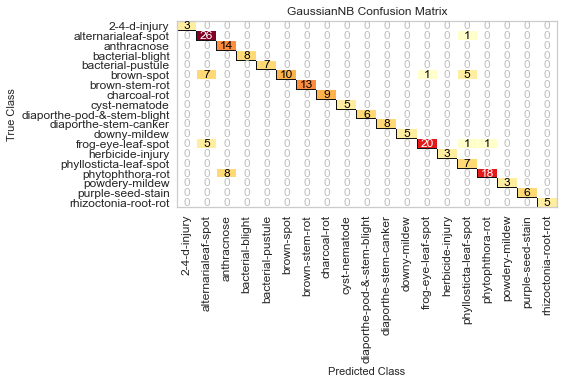

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [9]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

Aplicação de RandomForest

In [23]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
#confusao

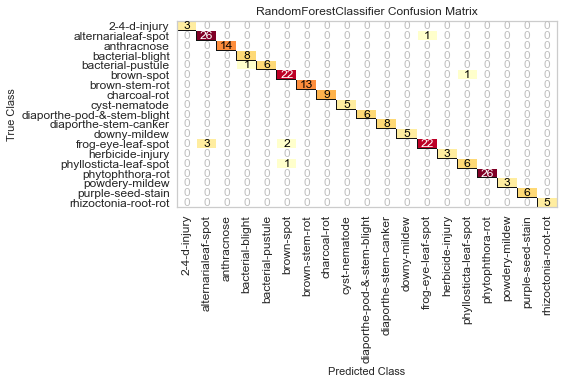

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
v = ConfusionMatrix(RandomForestClassifier(n_estimators = 100))
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [25]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9560975609756097